<a href="https://colab.research.google.com/github/ccasado/bootcamp-dados/blob/main/Para_Saber_Mais_CV_notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aulas


## Dados

https://www.seade.gov.br/coronavirus/

## Aula 01 - Entendendo a Série Temporal

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [4]:
dados = pd.read_csv(url, sep=";")

In [5]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [6]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [7]:
import matplotlib as mpl

In [8]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (20,8)

In [9]:
import seaborn as sns

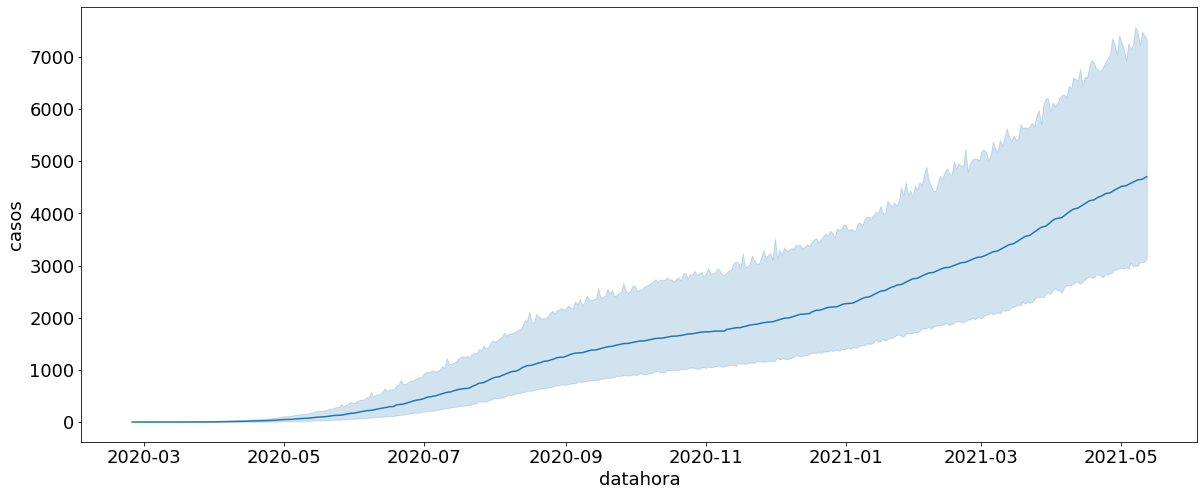

In [10]:
sns.lineplot(x='datahora',y='casos',data=dados)

In [11]:
dados_sp = dados.query('nome_munic == "São Paulo"')

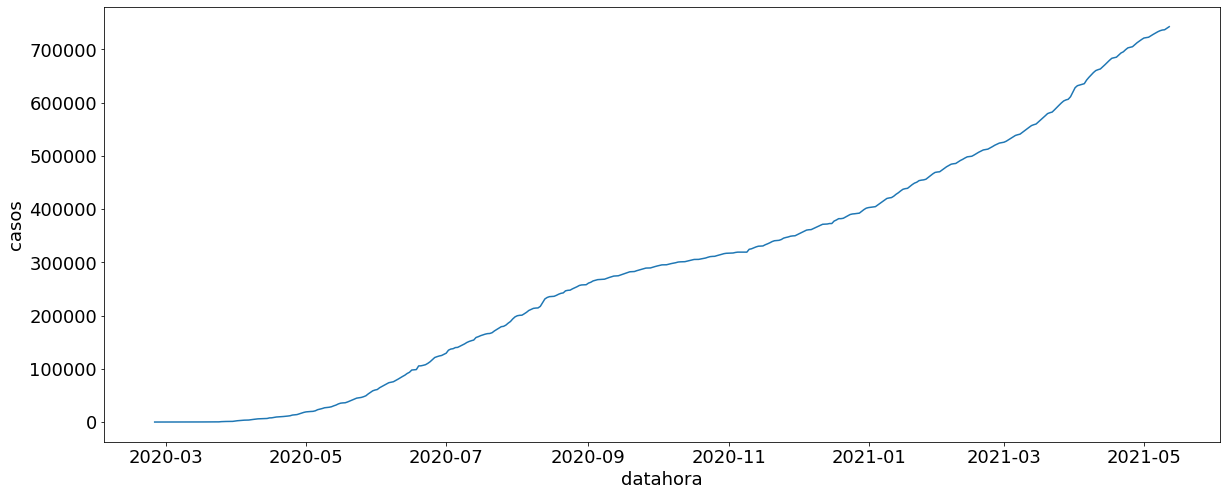

In [12]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)

In [13]:
import numpy as np

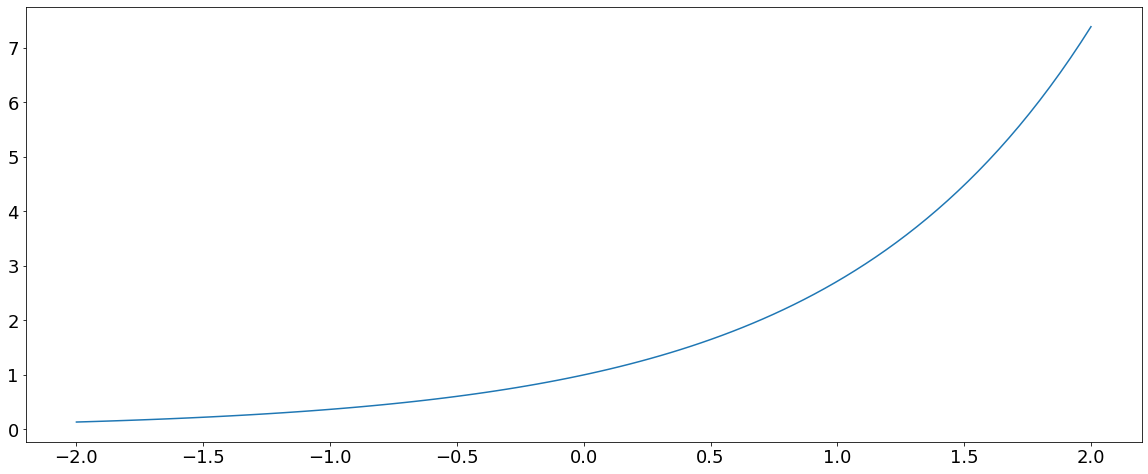

In [14]:
#eˆx

eixo_x = np.linspace(-2, 2, 100)
y_exp = np.exp(eixo_x)

sns.lineplot(x=eixo_x,y=y_exp)

$$ log_2 2  = 1 $$
$$ log_2 2^x = x $$


$$ log_e e^x = x $$


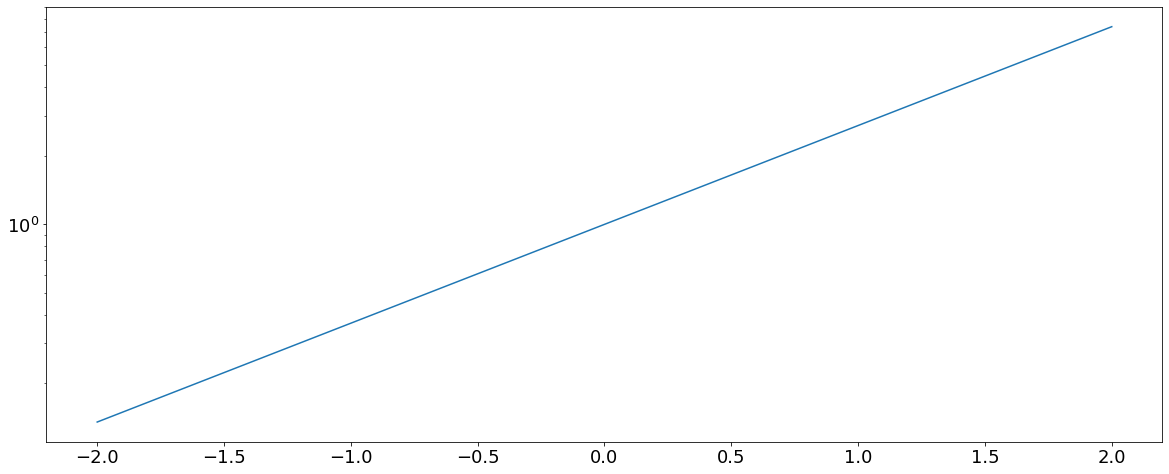

In [15]:
sns.lineplot(x=eixo_x,y=y_exp)
mpl.pyplot.yscale('log')

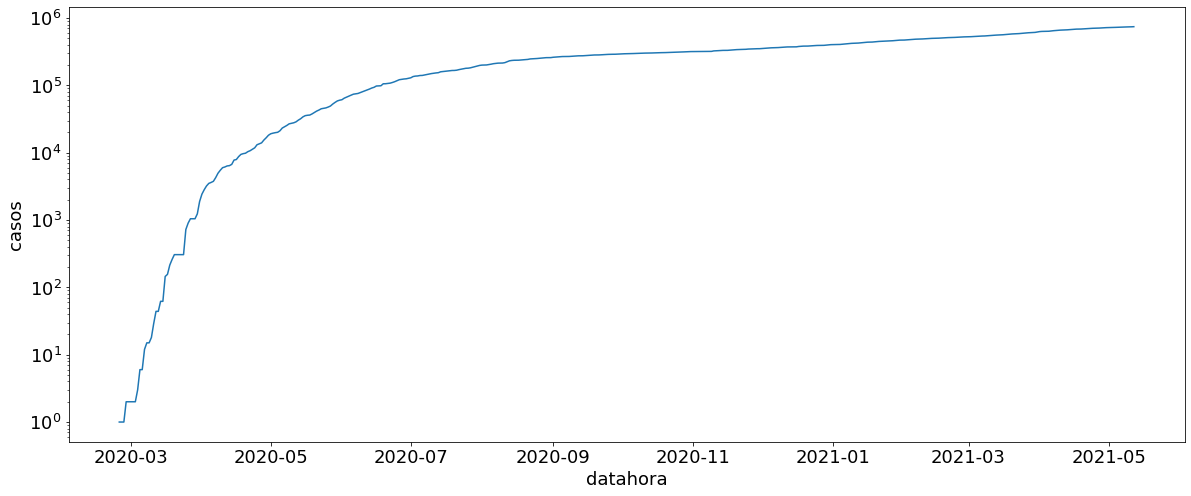

In [16]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)
mpl.pyplot.yscale('log')

### Taxa de casos novos

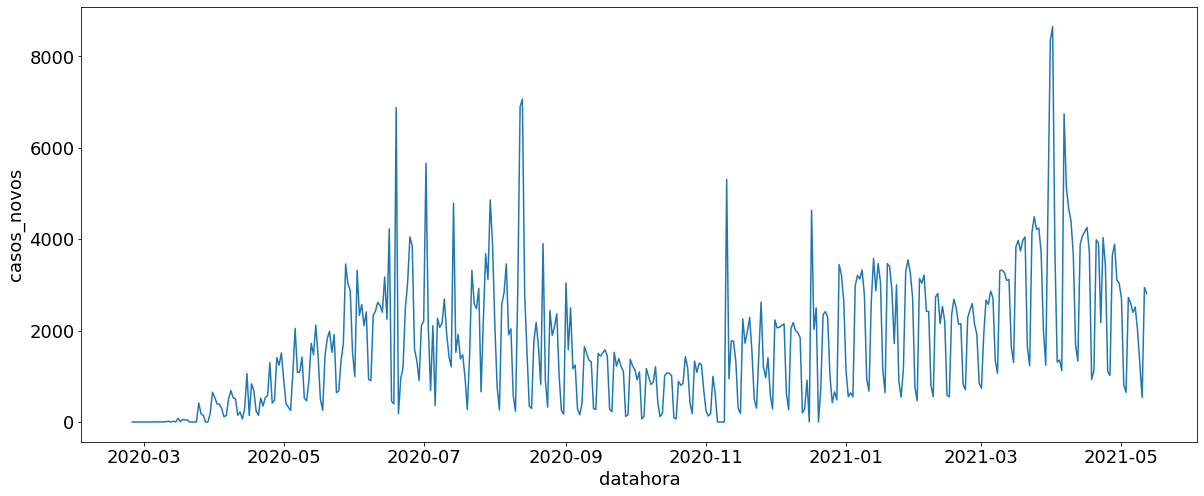

In [17]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp)

In [18]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10)) 

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

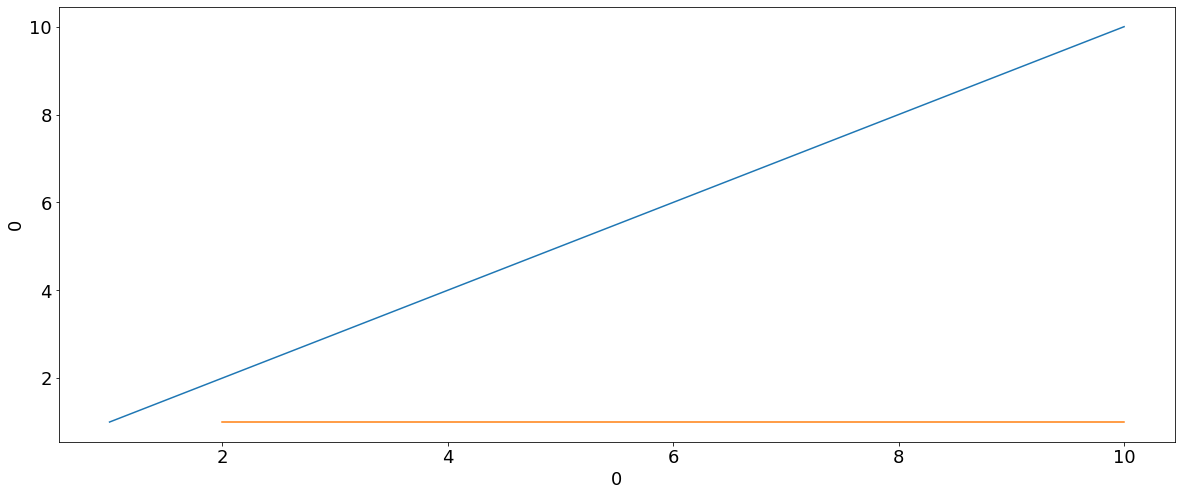

In [20]:
sns.lineplot(x=0,y=0,data=dados_exemplo)
sns.lineplot(x=0,y='diferenciado',data=dados_exemplo)

In [21]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

Text(0.5, 1.0, 'Taxa de crescimento de casos em SP')

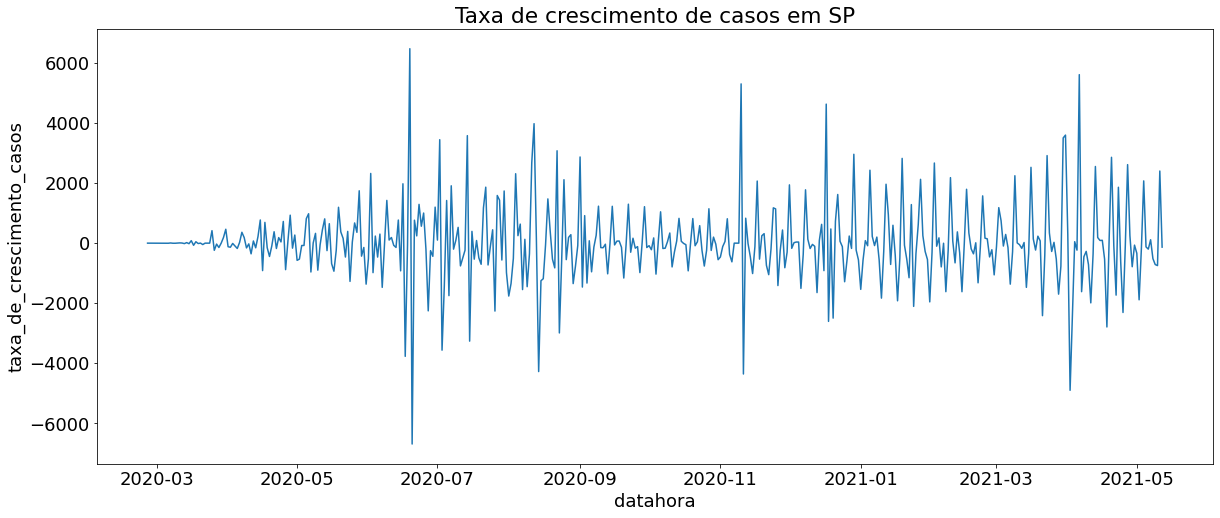

In [22]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_casos',data=dados_sp).set_title('Taxa de crescimento de casos em SP')
#sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp)

Text(0.5, 1.0, 'Taxa de crescimento de óbitos em SP')

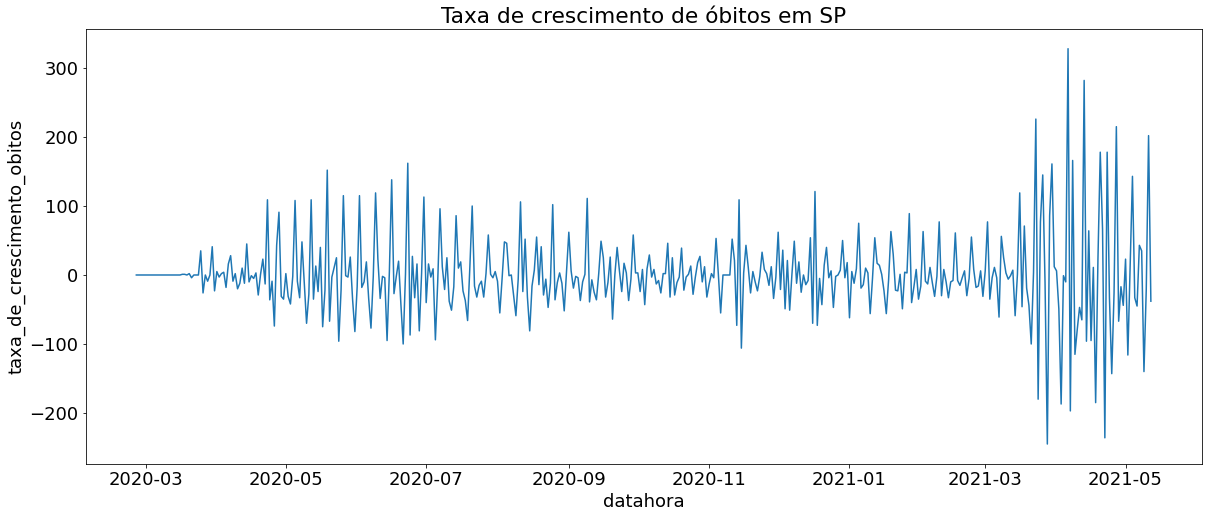

In [23]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp).set_title('Taxa de crescimento de óbitos em SP')

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

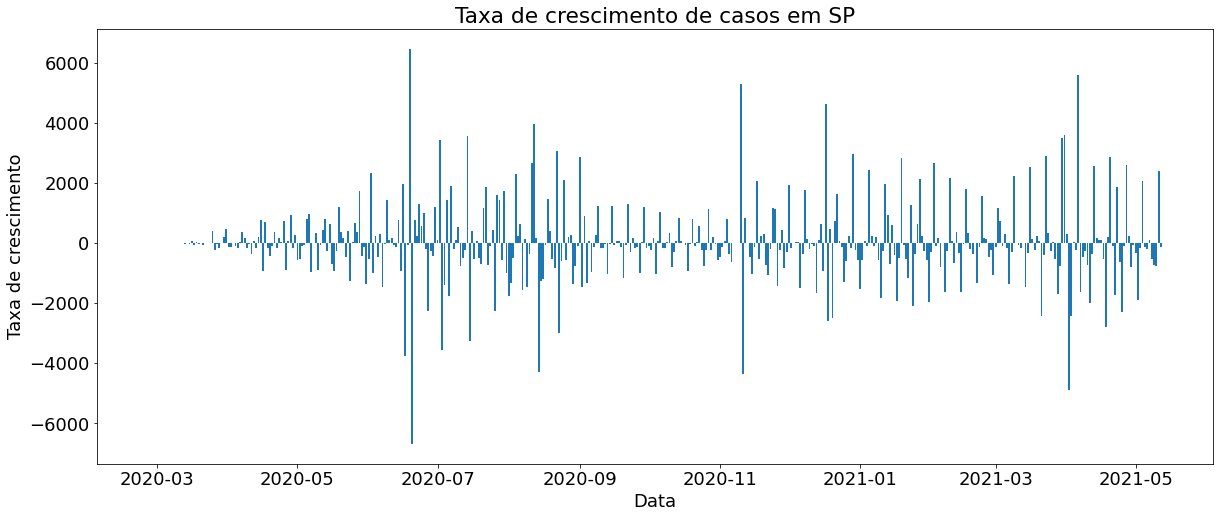

In [25]:
plt.bar(dados_sp['datahora'],dados_sp['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

In [26]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [27]:
dados_2021 = dados_sp.query('ano==2021')

Text(0.5, 0, 'Data')

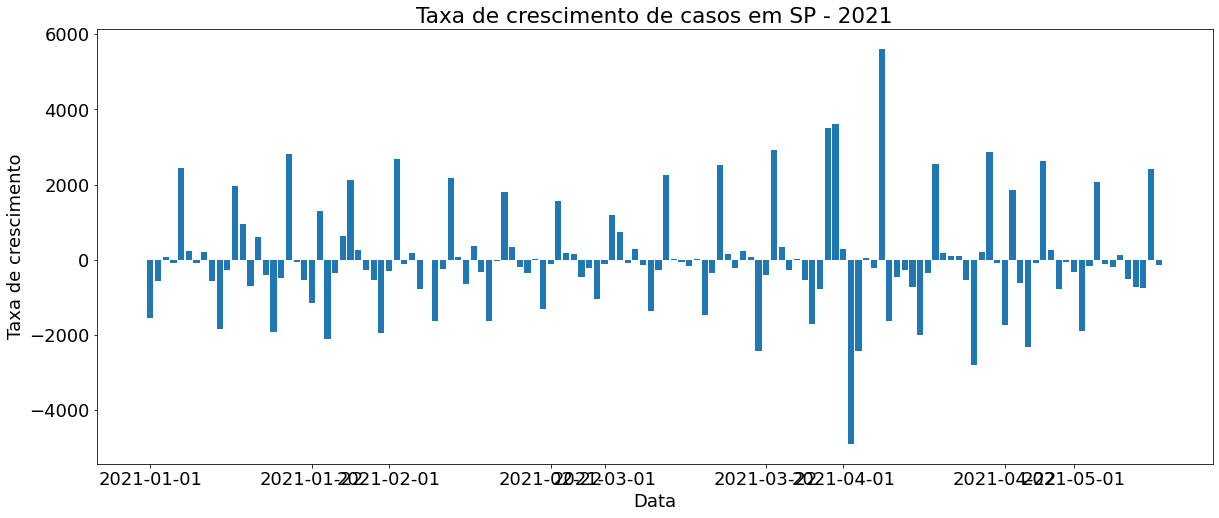

In [28]:
plt.bar(dados_2021['datahora'],dados_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP - 2021')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

In [29]:
dados_sp['media_movel_casos']=dados_sp['casos_novos'].rolling(window=7, center=False).mean()

dados_sp['media_movel_obitos']=dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

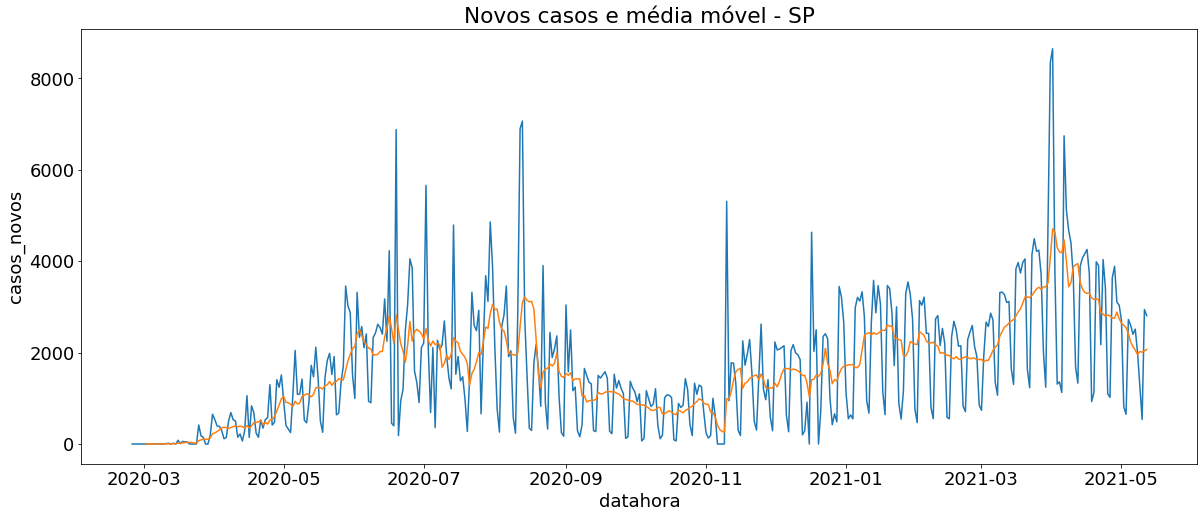

In [30]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp).set_title('Novos casos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_casos',data=dados_sp)

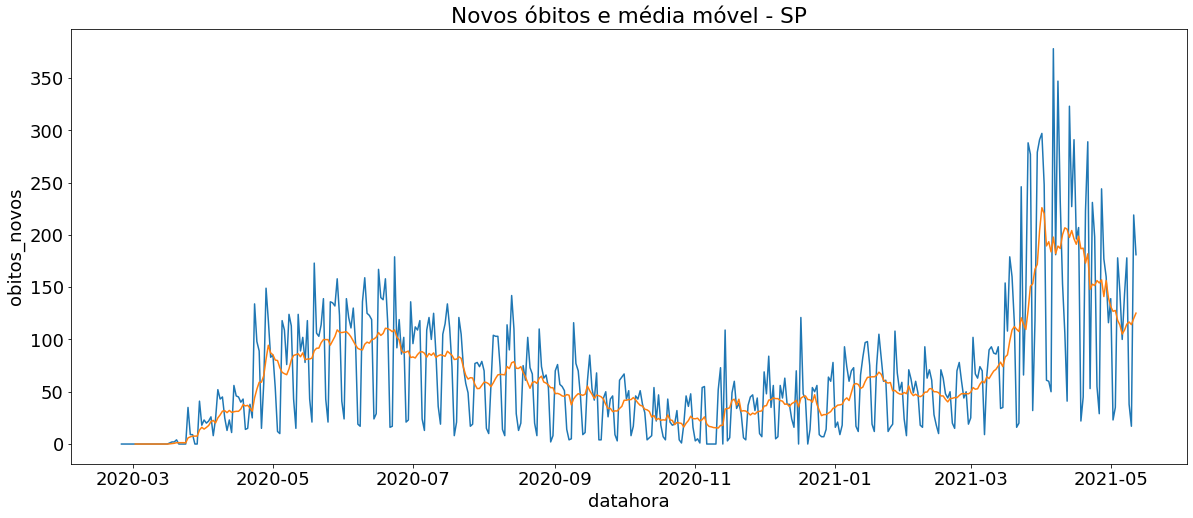

In [31]:
sns.lineplot(x='datahora',y='obitos_novos',data=dados_sp).set_title('Novos óbitos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_obitos',data=dados_sp)

In [32]:
dados_sp['taxa_de_crescimento_media_movel_casos'] = dados_sp['media_movel_casos'].diff()
dados_sp['taxa_de_crescimento_media_movel_obitos'] = dados_sp['media_movel_obitos'].diff()

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de casos em SP')

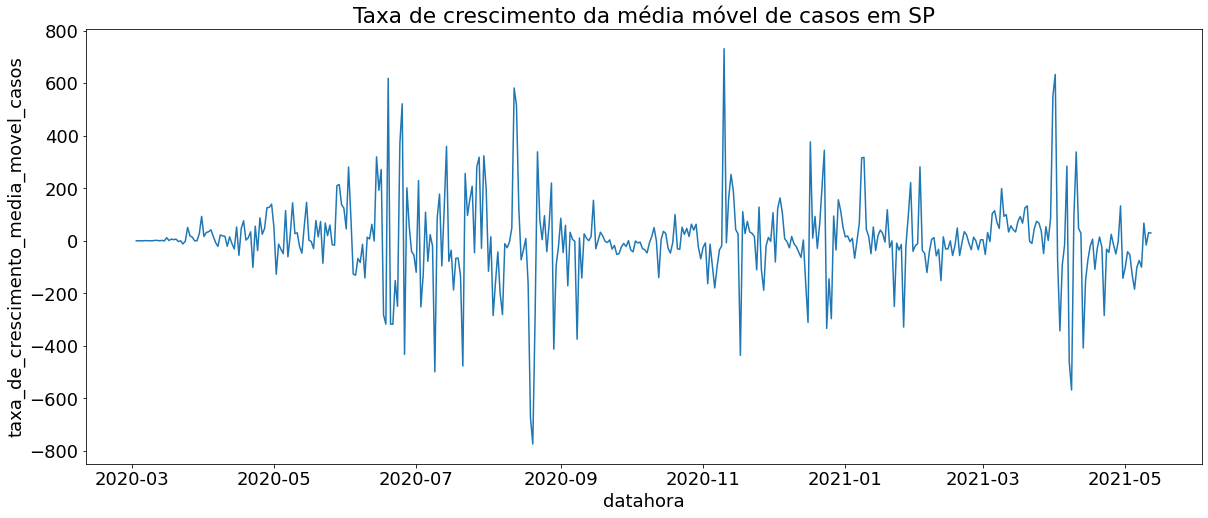

In [33]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_casos',data=dados_sp).set_title('Taxa de crescimento da média móvel de casos em SP')

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de óbitos em SP')

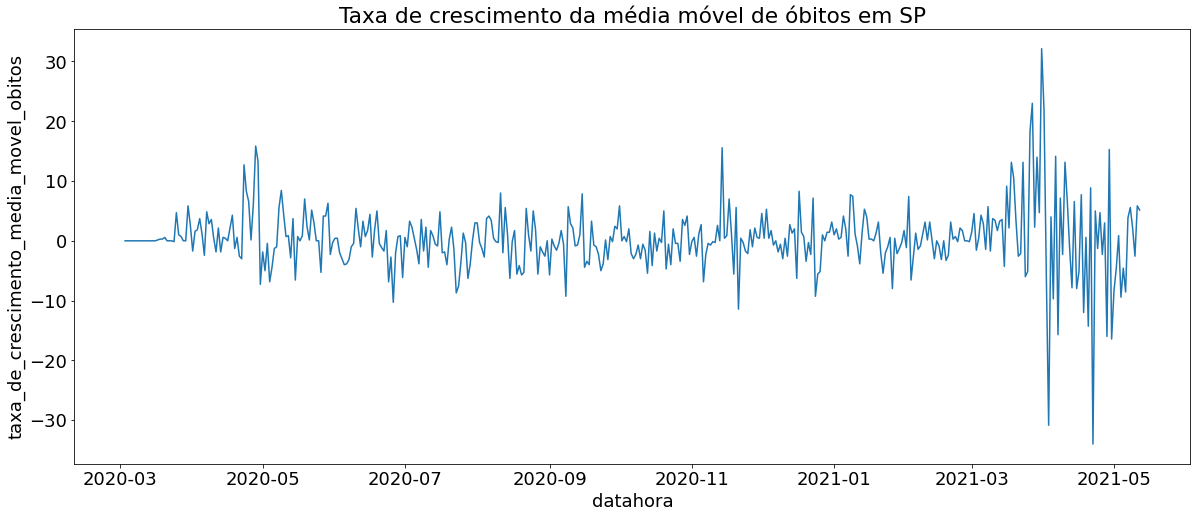

In [34]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_obitos',data=dados_sp).set_title('Taxa de crescimento da média móvel de óbitos em SP')

### Correlação

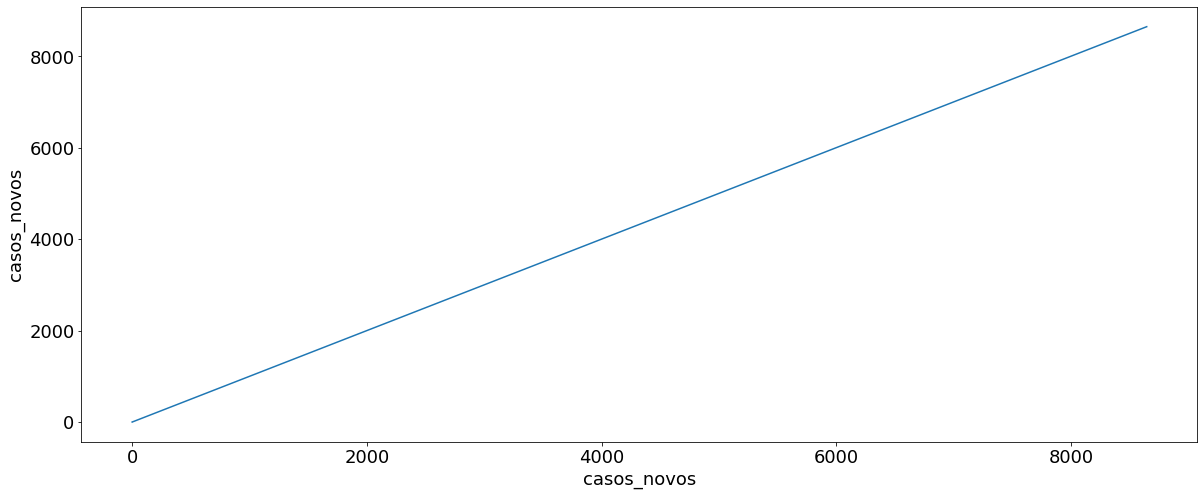

In [35]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dados_sp)

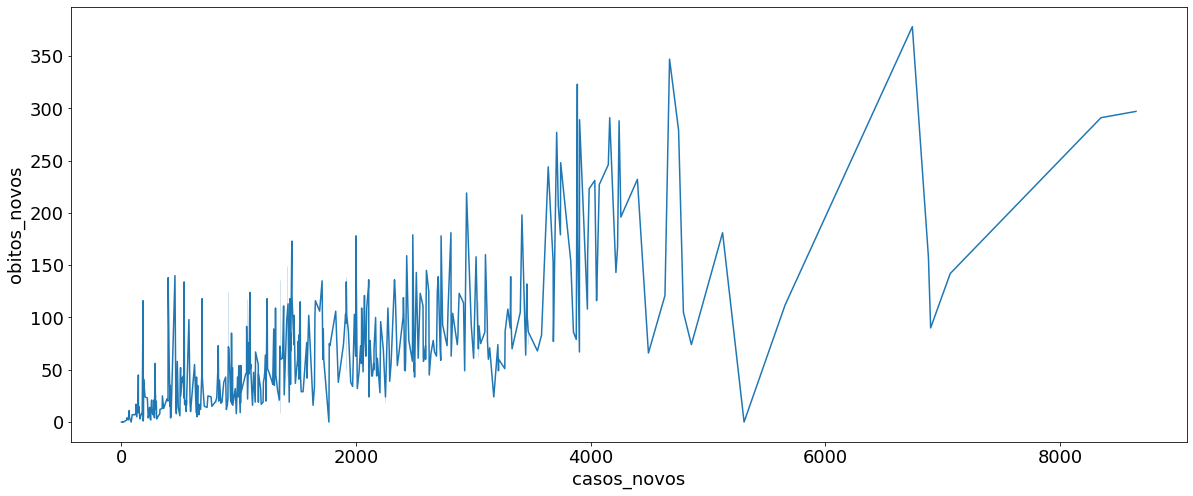

In [36]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_sp)

In [37]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dado_202102 = dados_sp.query('mes==2 & ano==2021')

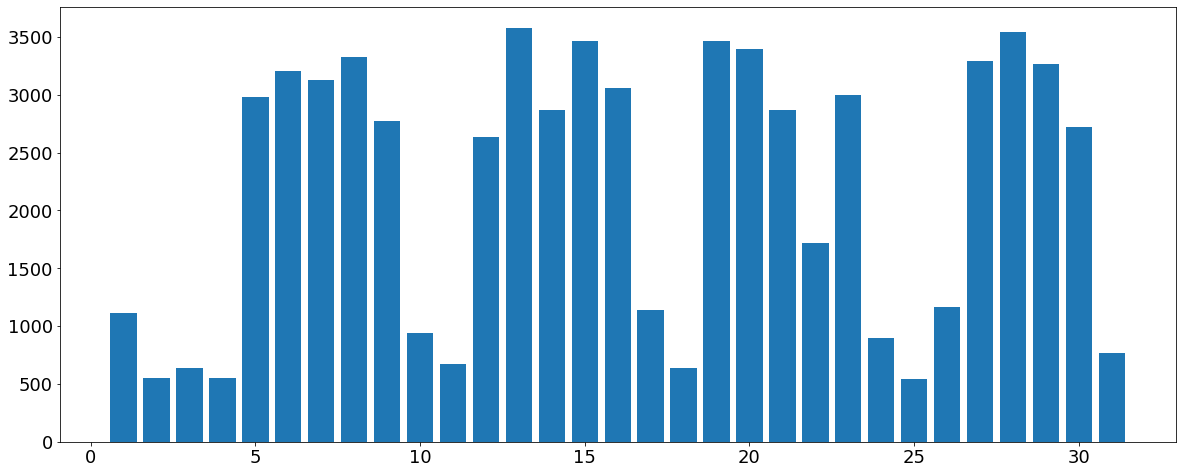

<BarContainer object of 28 artists>

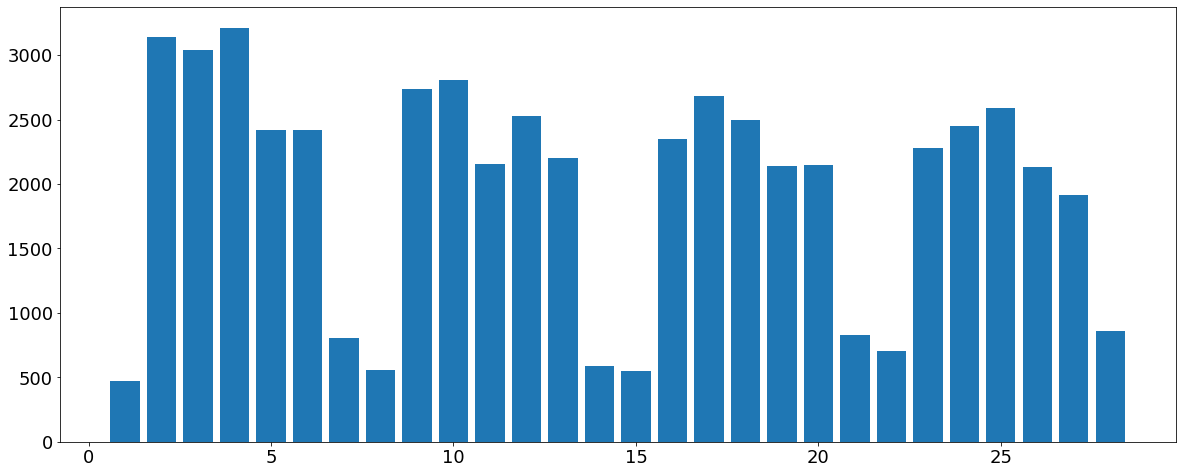

In [38]:
plt.bar(np.linspace(1,31,31),dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dado_202102['casos_novos'])

### Função de autocorrelação

In [39]:
from pandas.plotting import autocorrelation_plot

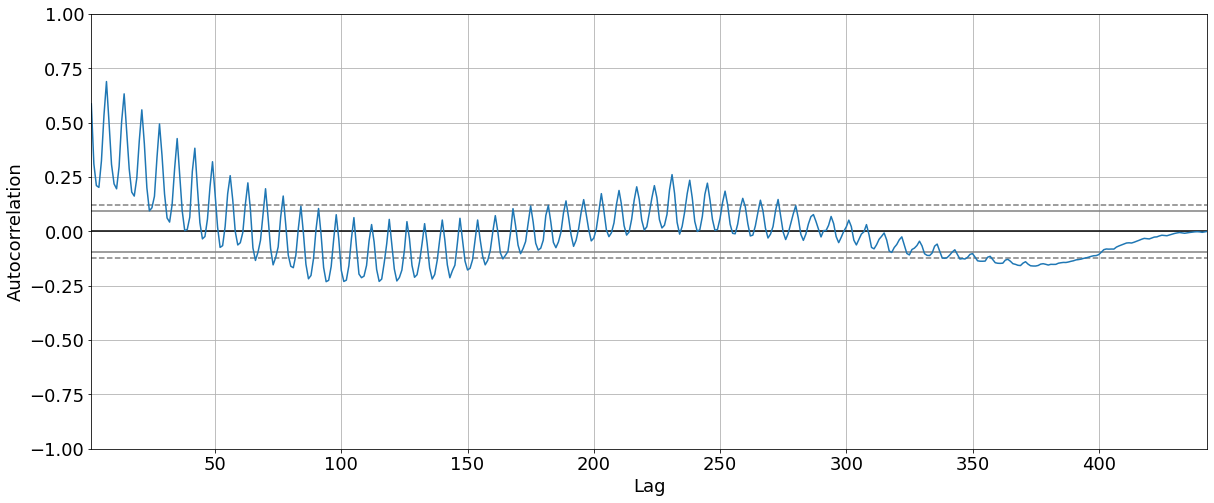

In [40]:
autocorrelation_plot(dados_sp['casos_novos'])

In [41]:
dados_sp.shape

(443, 33)

In [42]:
aleatorio = np.random.rand(435)

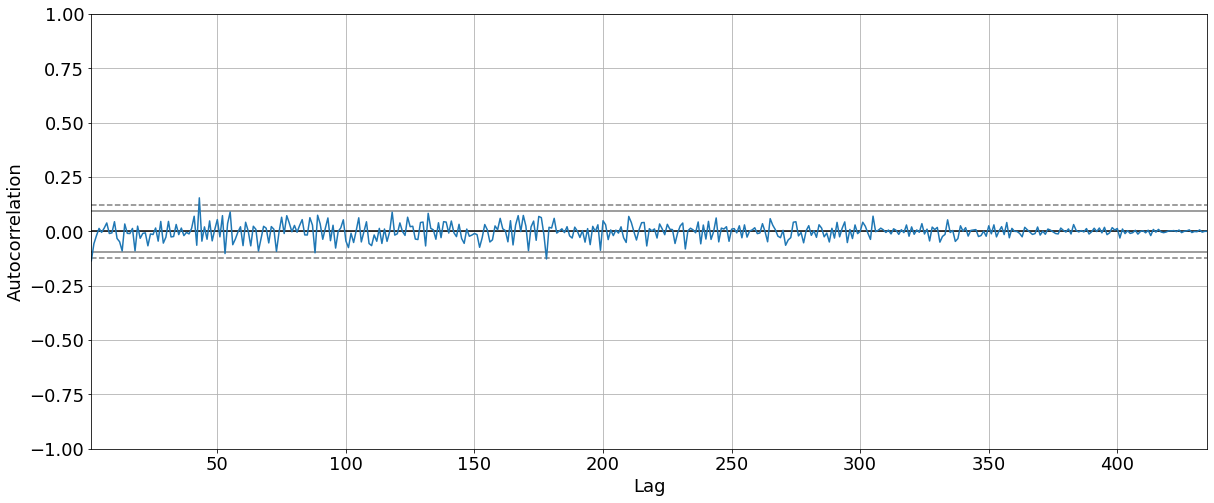

In [43]:
autocorrelation_plot(aleatorio)

### Desafios

##### Desafio 1: Mover os dados de óbitos_novos para trás e ver como isso modifica o gráfico de casos_novos por óbitos_novos.

#### Desafio 2: Gerar uma figura da função de correlação cruzada com duas variáveis diferentes (statsmodels).

#### Desafio 3: Fazer a mesma análise com outros municípios.

#### Desafio 4: Fazer o gráfico da taxa de aumento de casos de número de casos novos e número de óbtidos. 

## Aula 02 - Primeiras previsões

In [44]:
df = pd.DataFrame()

In [45]:
df['ds'] = dados_sp['datahora']

In [46]:
df['y'] = dados_sp['casos_novos']

In [47]:
from fbprophet import Prophet

In [48]:
modelo = Prophet()

In [49]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [51]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [52]:
previsao = modelo.predict(dataframefuturo)

In [53]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

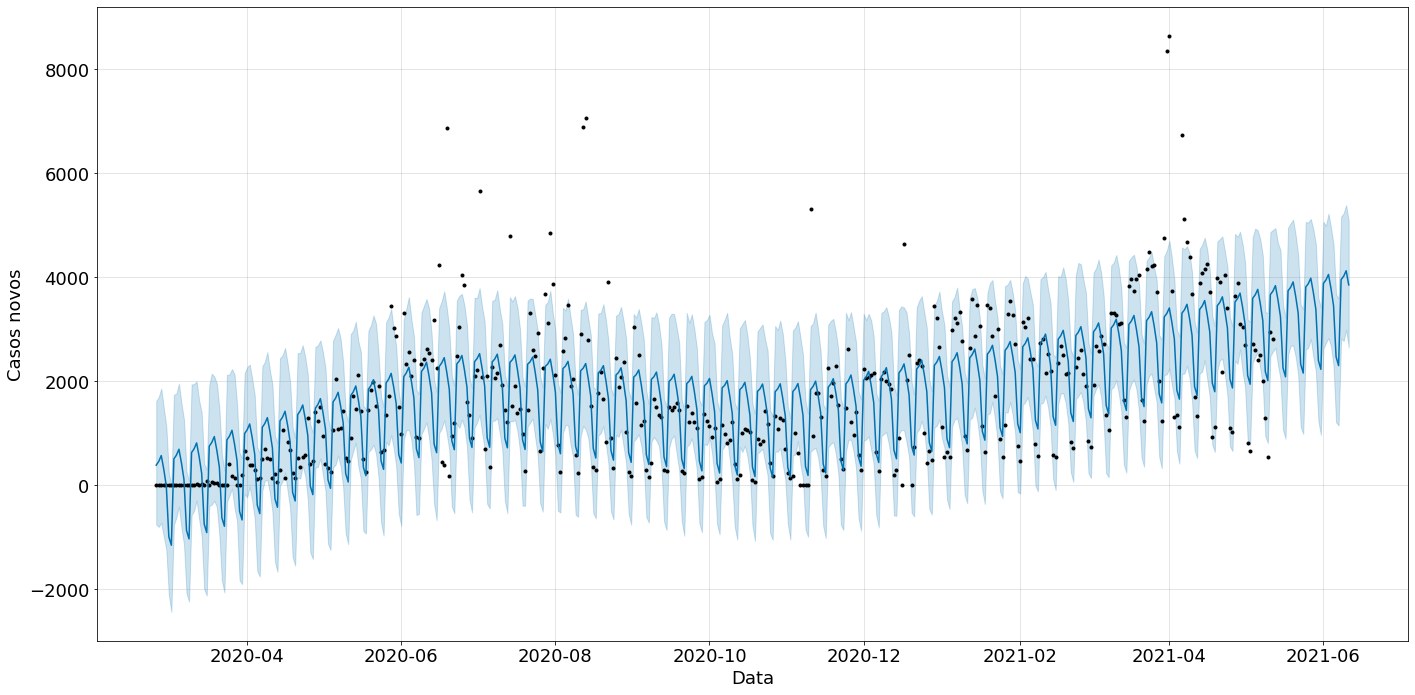

In [54]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))

In [55]:
dados_sp['datahora'].shape

(443,)

In [56]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] =dados_sp['casos_novos'][:400]

In [57]:
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] =dados_sp['casos_novos'][400:]

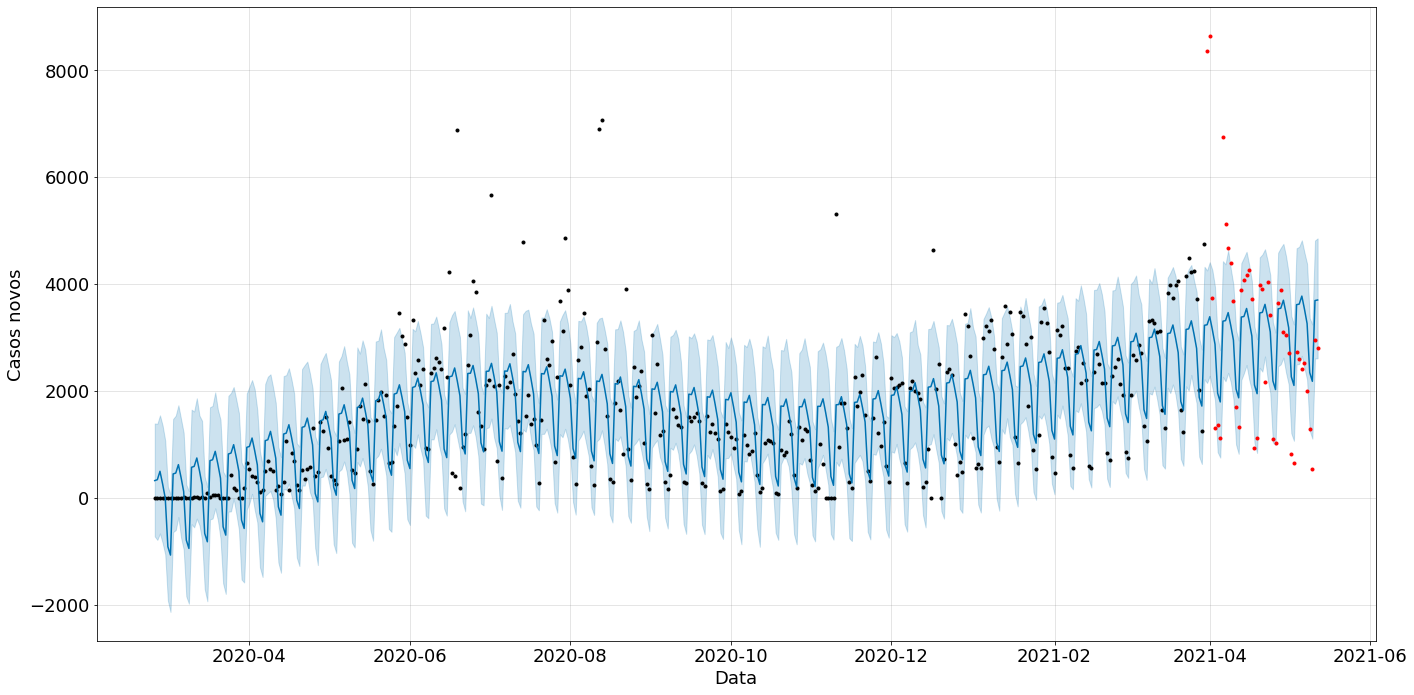

In [59]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')

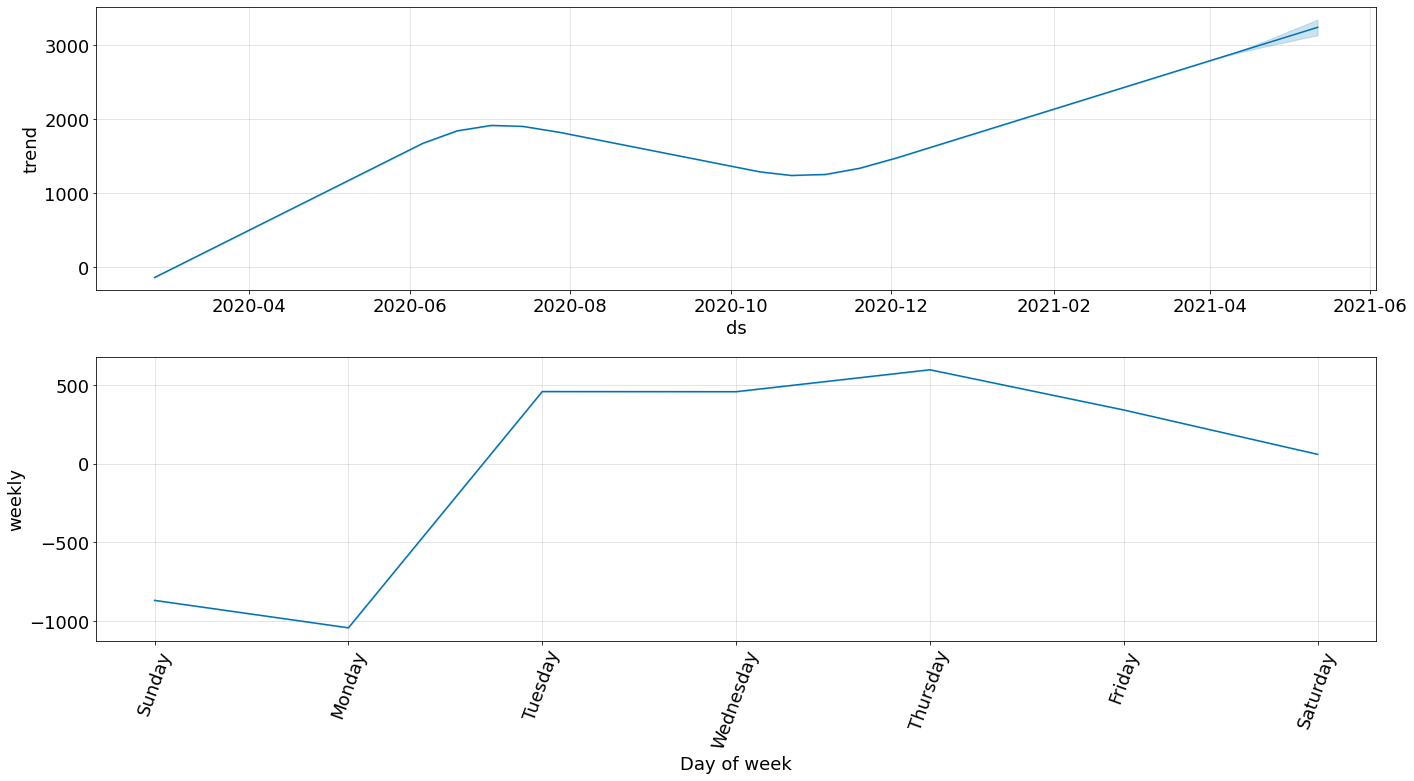

In [60]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70'); #olhar rotação

### Desafios

Desafio 01: Explorar a documentação do Prophet (destaque para o Quick Start)

Desafio 02: Há mudança na previsão quando aumentamos ou diminuimos os periods? (usamos: periods = 30)

Desafio 03: Melhorar os gráficos que construimos

## Aula 3 - Mudança de Tendência

In [61]:
from fbprophet.plot import add_changepoints_to_plot

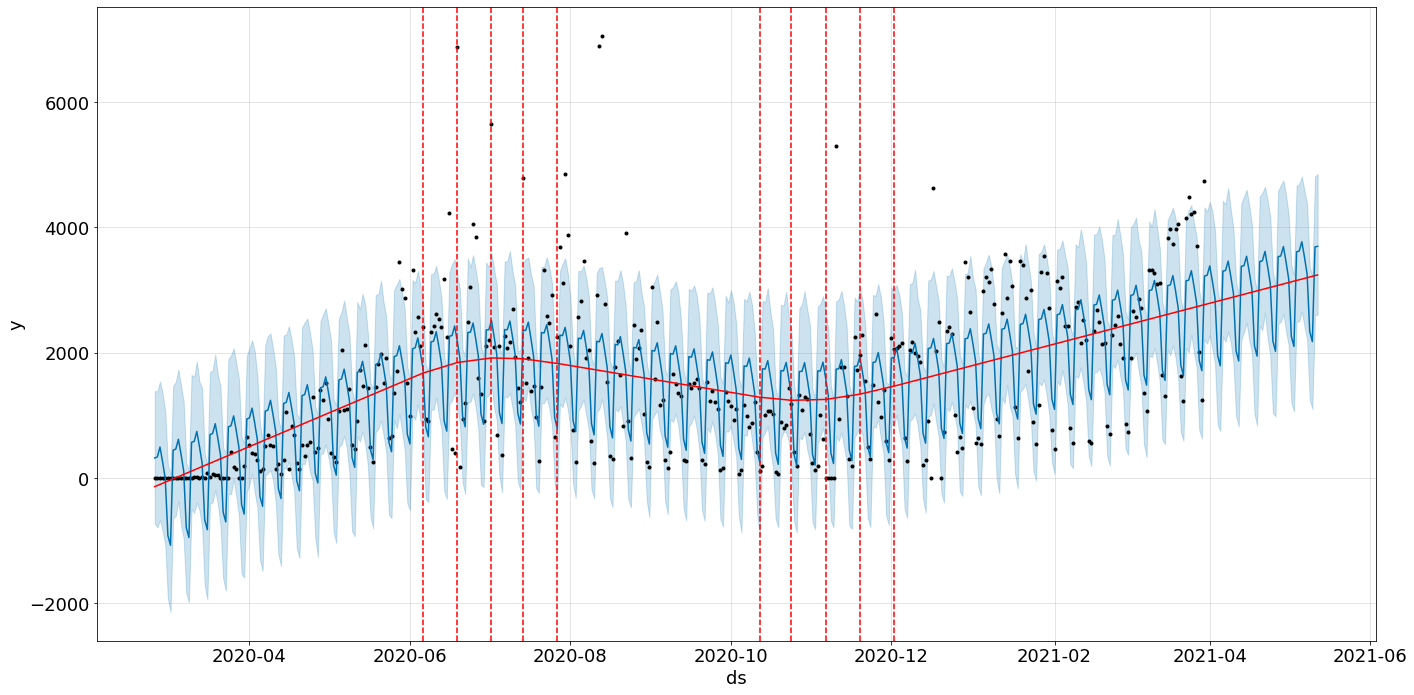

In [62]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [63]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0) #default = 0.05
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


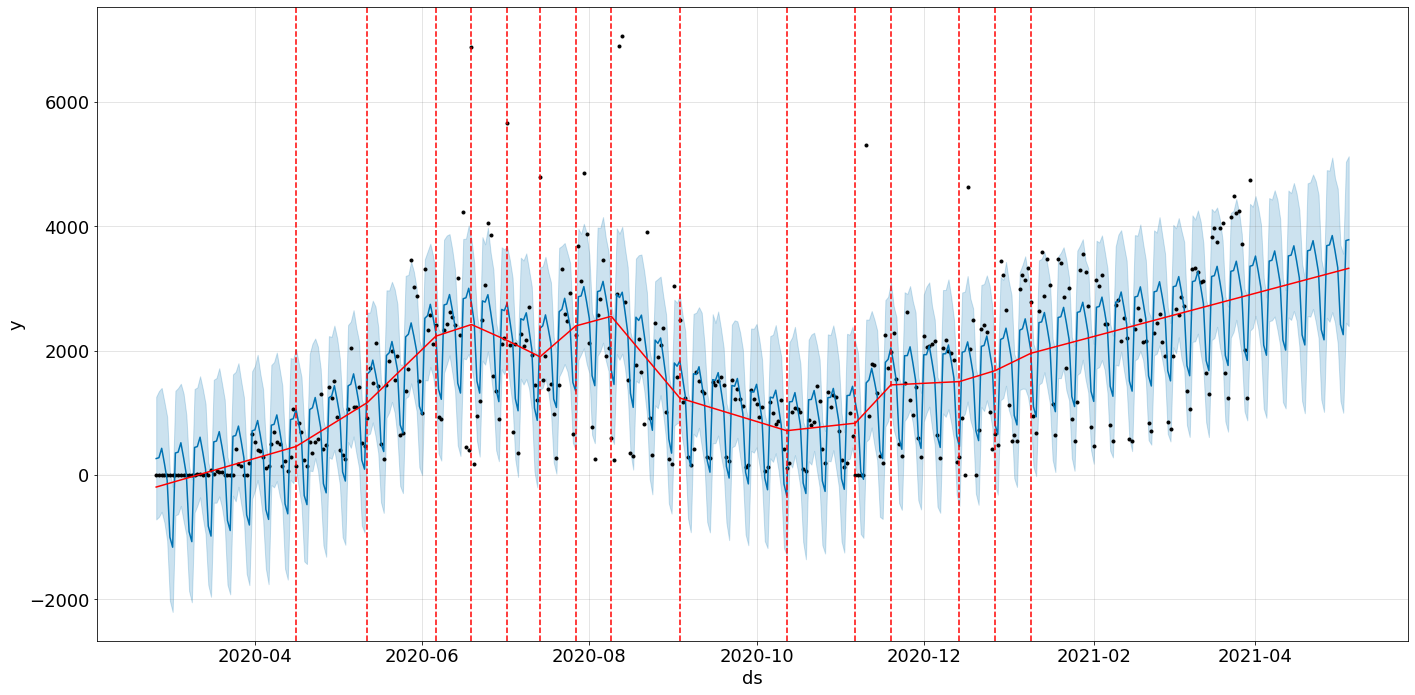

In [64]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [65]:
modelo = Prophet(changepoints=['2020-12-31'])
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


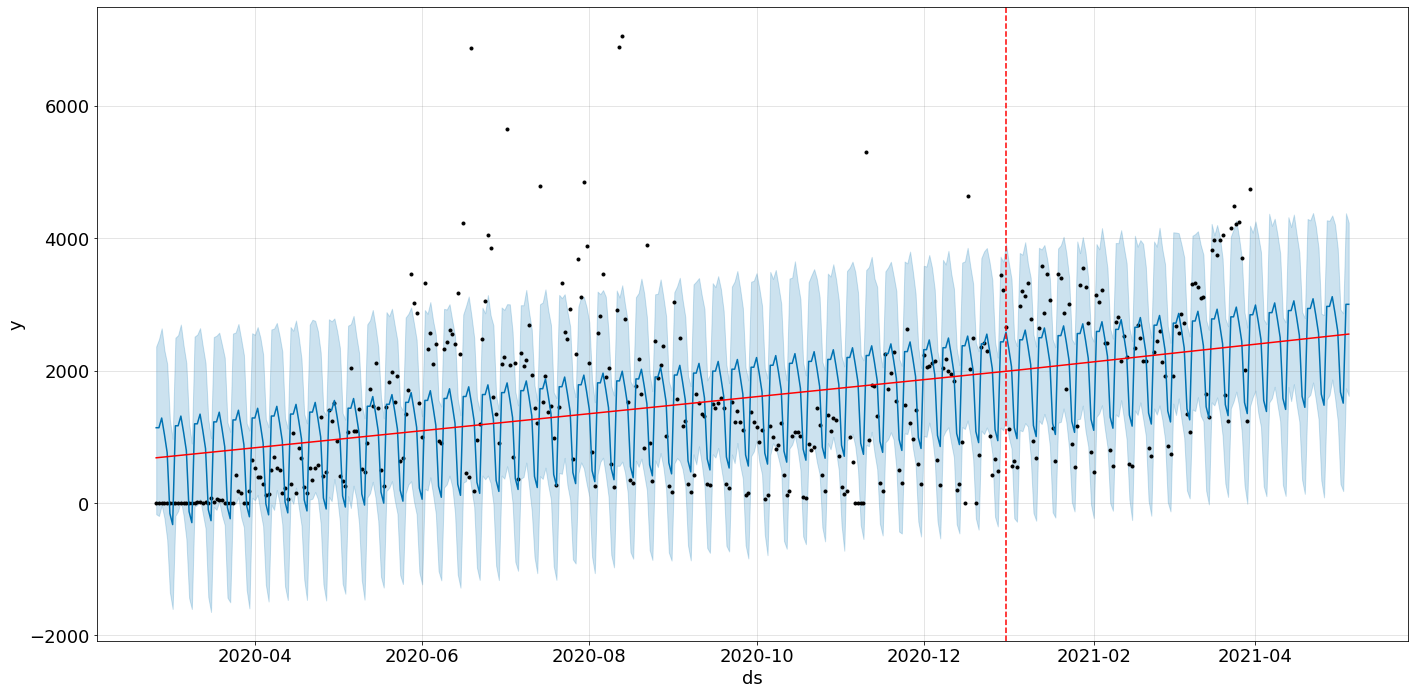

In [66]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### Desafios

Desafio 01: identificar potenciais changepoints a partir de um gráfico de barras e fazer o plot

Desafio: Taxa de isolamento (verificar). 

## Aula 4 - Sazonalidade, feriados

In [67]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0) #default = 0.05

In [68]:
# Usando os feriados normais do país
modelo.add_country_holidays(country_name='BR')

In [69]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

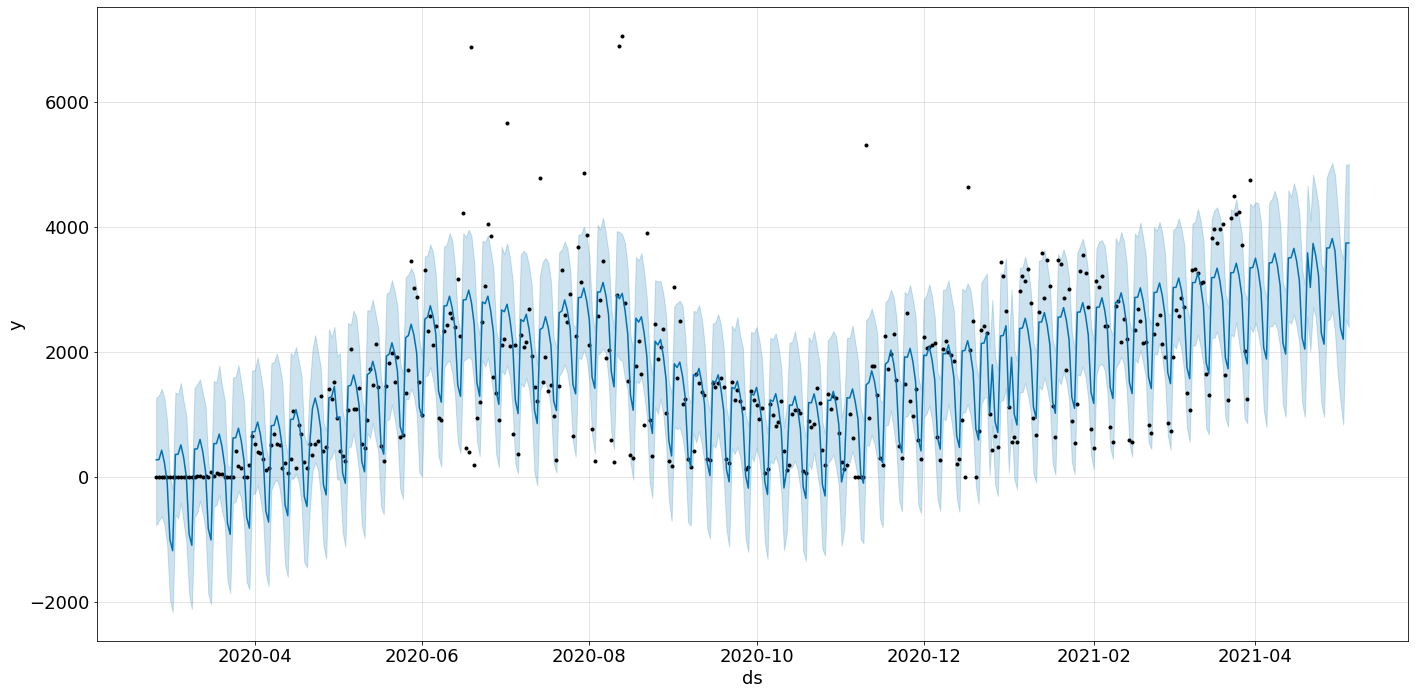

In [71]:
fig = modelo.plot(previsao, figsize=(20,10));

In [72]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [73]:
# Usando os feriados do município de SP


modelo_feriados = Prophet(n_changepoints = 25, changepoint_prior_scale=10.0, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=36)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -145.406161  ...                         0.0  100.747530
1 2020-02-26 -134.933910  ...                         0.0  109.318663
2 2020-02-27 -124.461660  ...                         0.0  468.680791
3 2020-02-28 -113.989409  ...                         0.0  236.671764
4 2020-02-29 -103.517159  ...                         0.0  -56.860013

[5 rows x 25 columns]

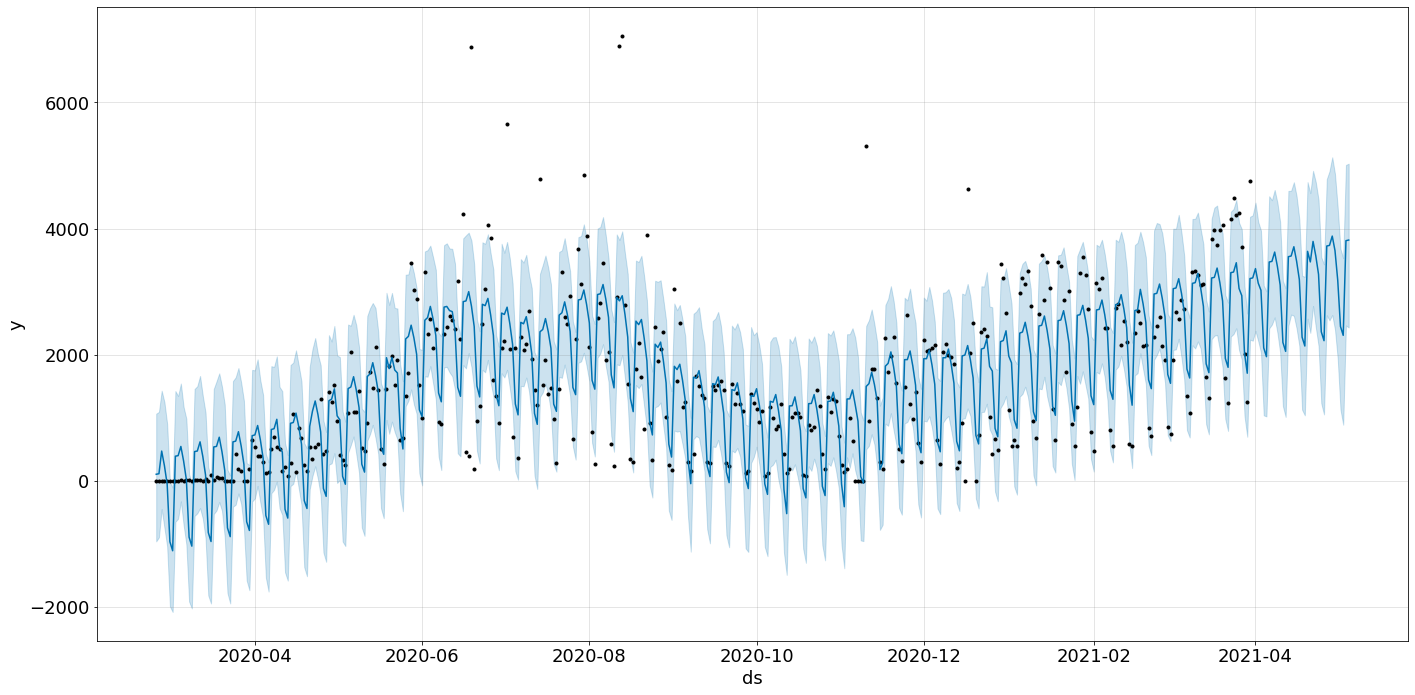

In [75]:
fig = modelo_feriados.plot(previsao, figsize=(20,10));

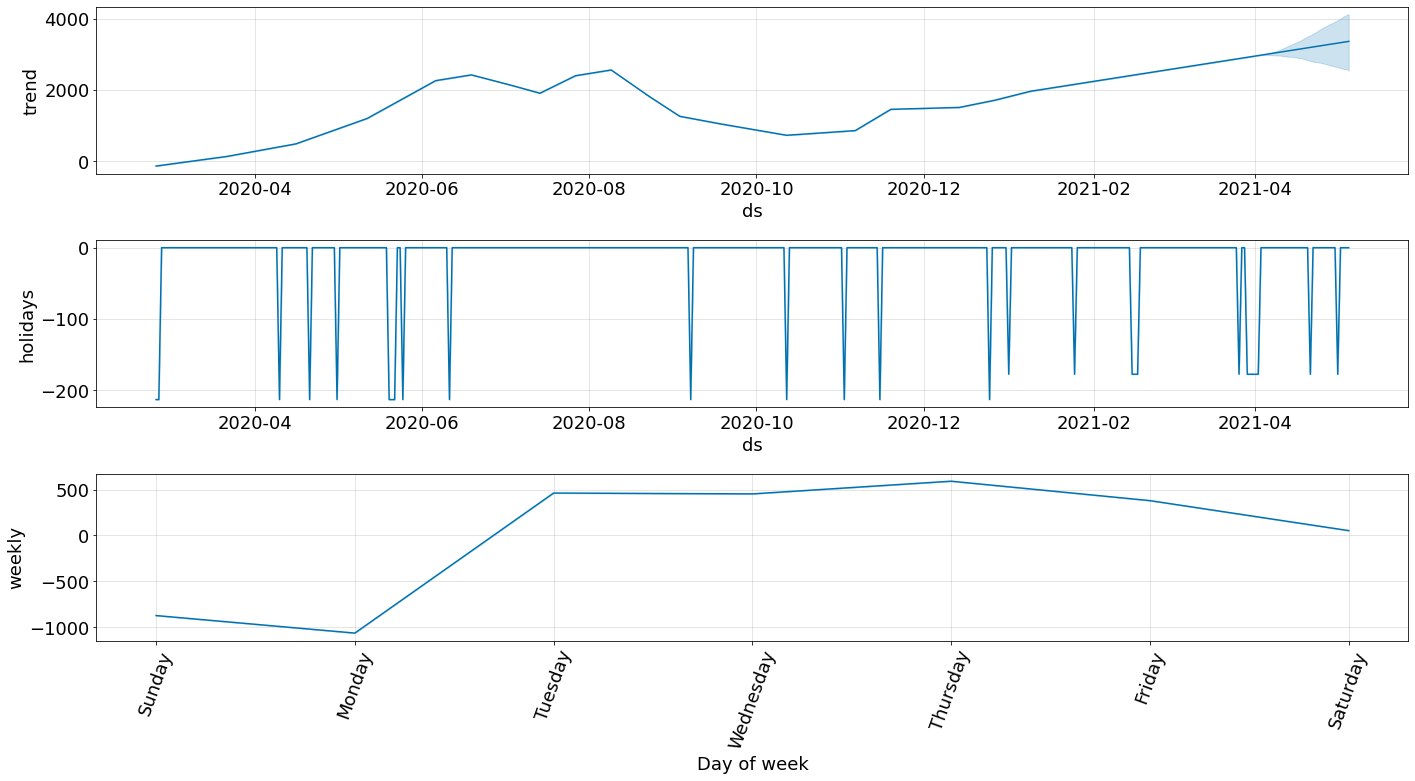

In [76]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70'); #olhar rotação

### Sazonalidade

In [77]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


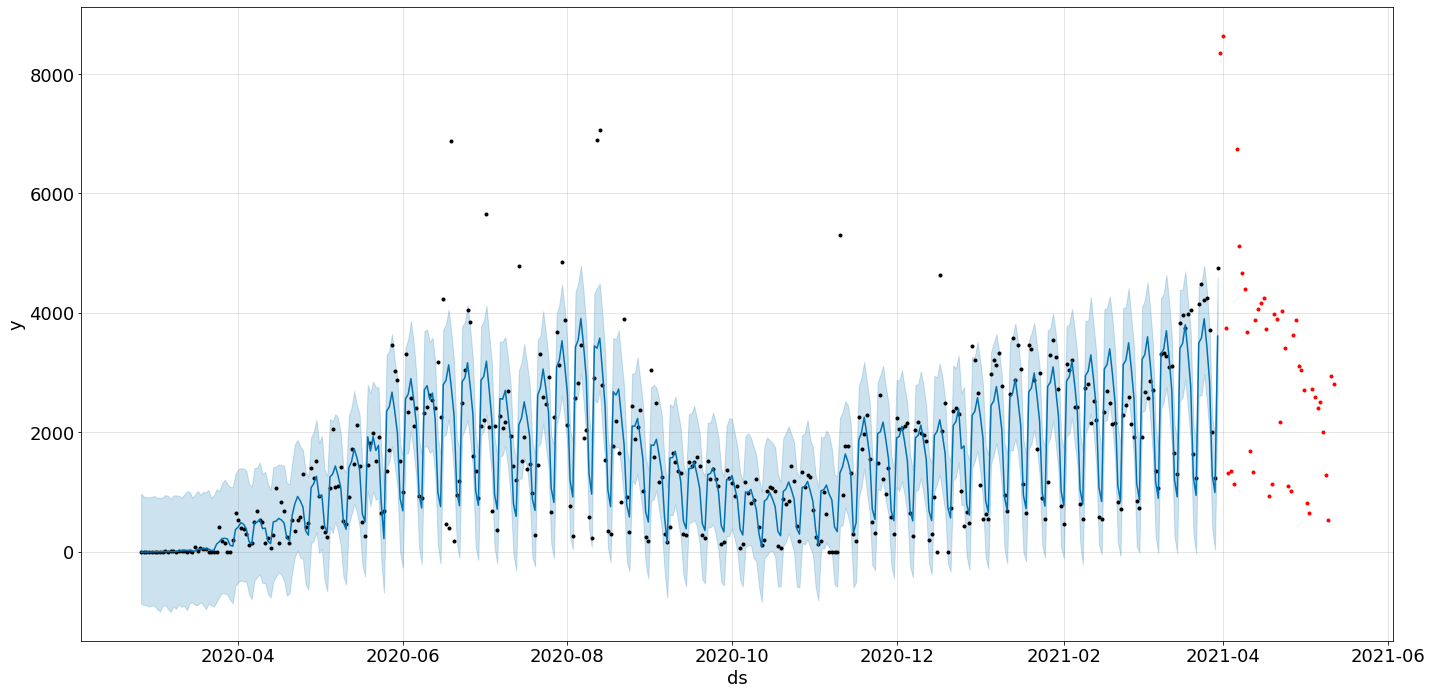

In [78]:
fig = modelo.plot(previsao, figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
#Sazonalidade aditiva
mean_absolute_error(df['y'],previsao['yhat'])

449.7266549322682

In [81]:
#Sazonalidade multiplicativa
mean_absolute_error(df['y'],previsao['yhat'])

449.7266549322682

## Aula 5 - Outliers e validação

In [82]:
novo_y = df.reset_index()

In [83]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower']) & (novo_y['y'] < previsao['yhat_upper'])]

In [84]:
sem_outliers

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
394  254692 2021-03-25  4214
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242

[355 rows x 3 columns]

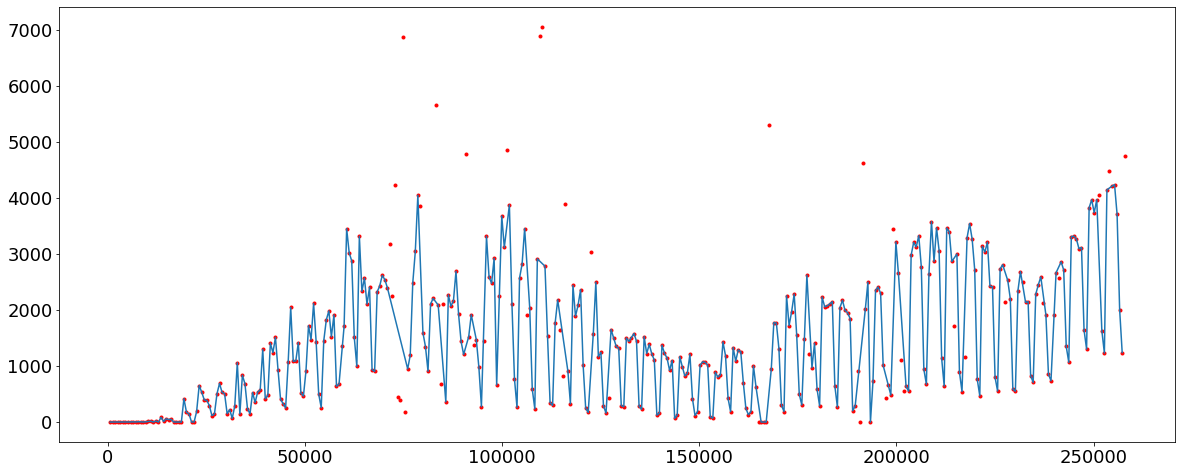

In [85]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [86]:
df_sem_outliers = sem_outliers[['ds','y']]

In [87]:
df_sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
394 2021-03-25  4214
395 2021-03-26  4241
396 2021-03-27  3709
397 2021-03-28  2010
398 2021-03-29  1242

[355 rows x 2 columns]

In [88]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


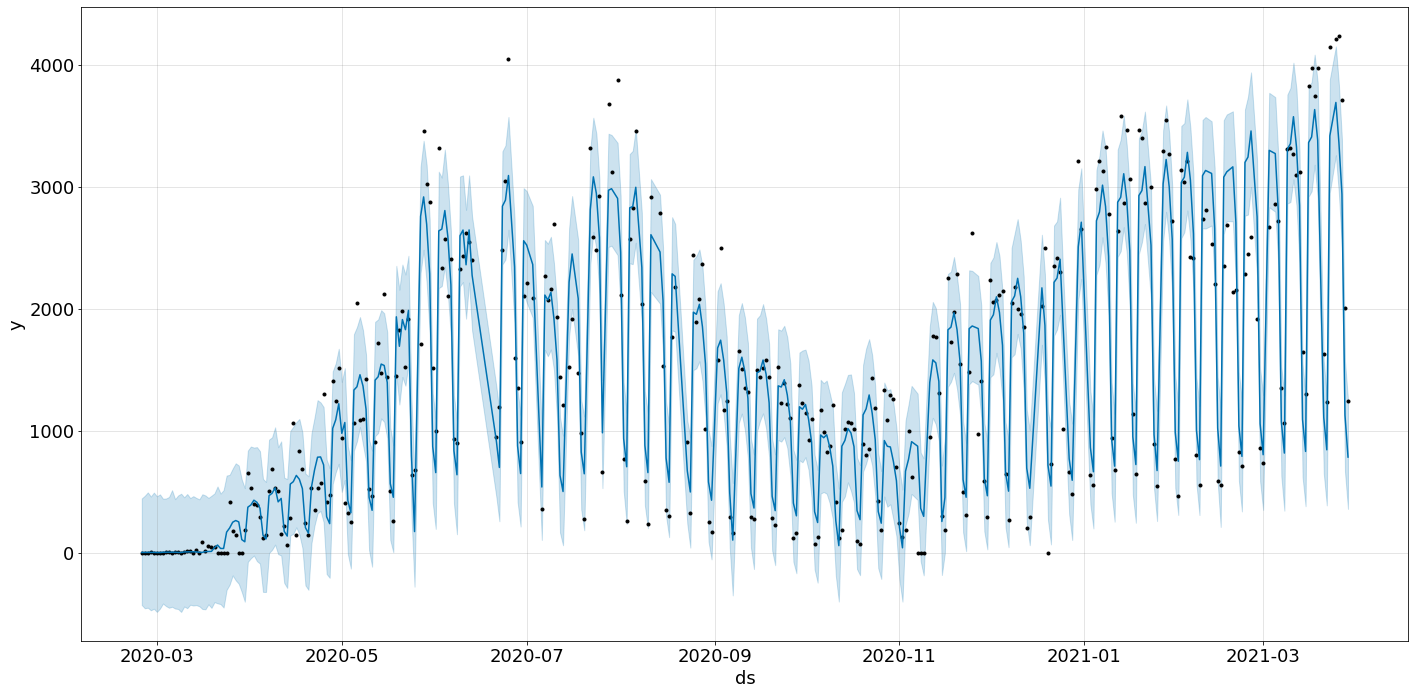

In [89]:
fig = modelo.plot(previsao, figsize=(20,10));

### Intervalo de confiânça

In [90]:
modelo = Prophet(interval_width=0.80, n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


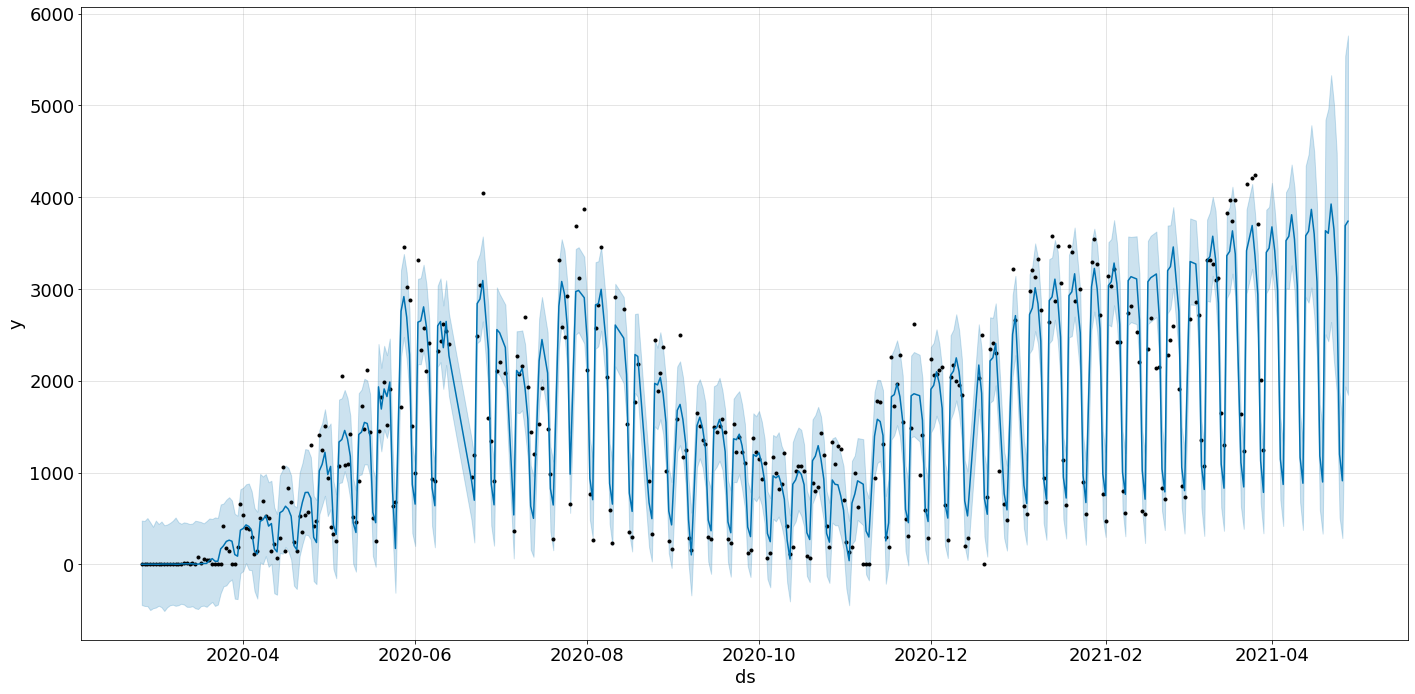

In [91]:
fig = modelo.plot(previsao, figsize=(20,10));

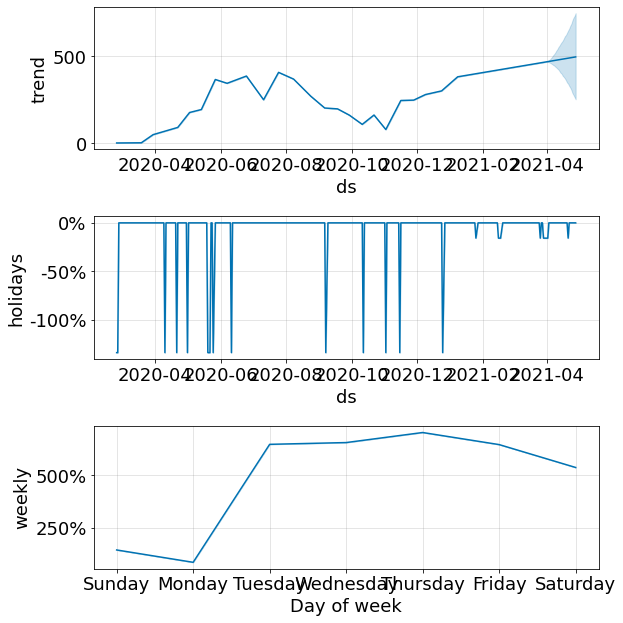

In [92]:
modelo.plot_components(previsao);

In [93]:
amostras = modelo.predictive_samples(previsao)

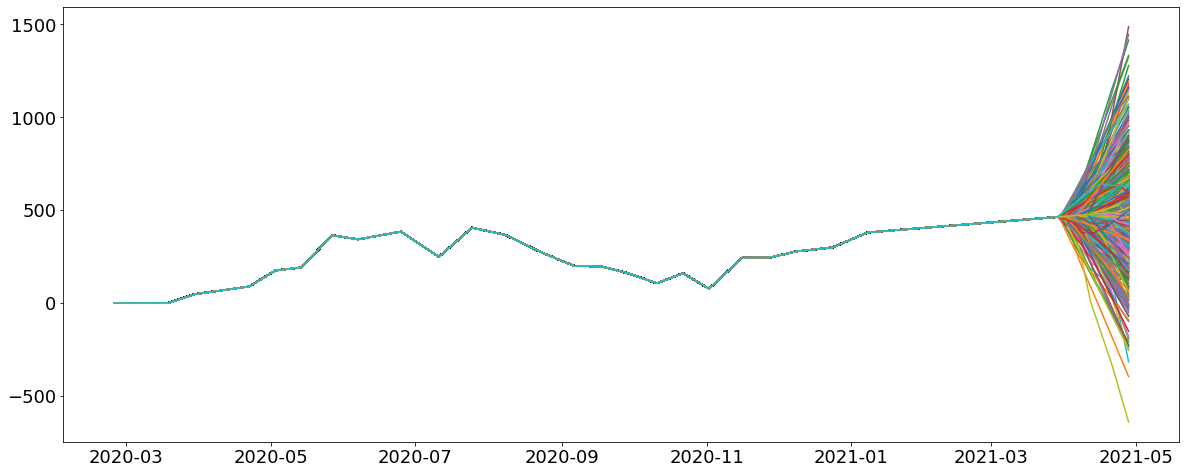

In [94]:
plt.plot(previsao['ds'],amostras['trend']);

### Validação

In [95]:
from fbprophet.diagnostics import cross_validation

In [96]:
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [97]:
df_cv['cutoff'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [98]:
janela = 5 #mudar o valor da janela para verificar as janelas utilizadas para a validação dos resultados. 

In [99]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

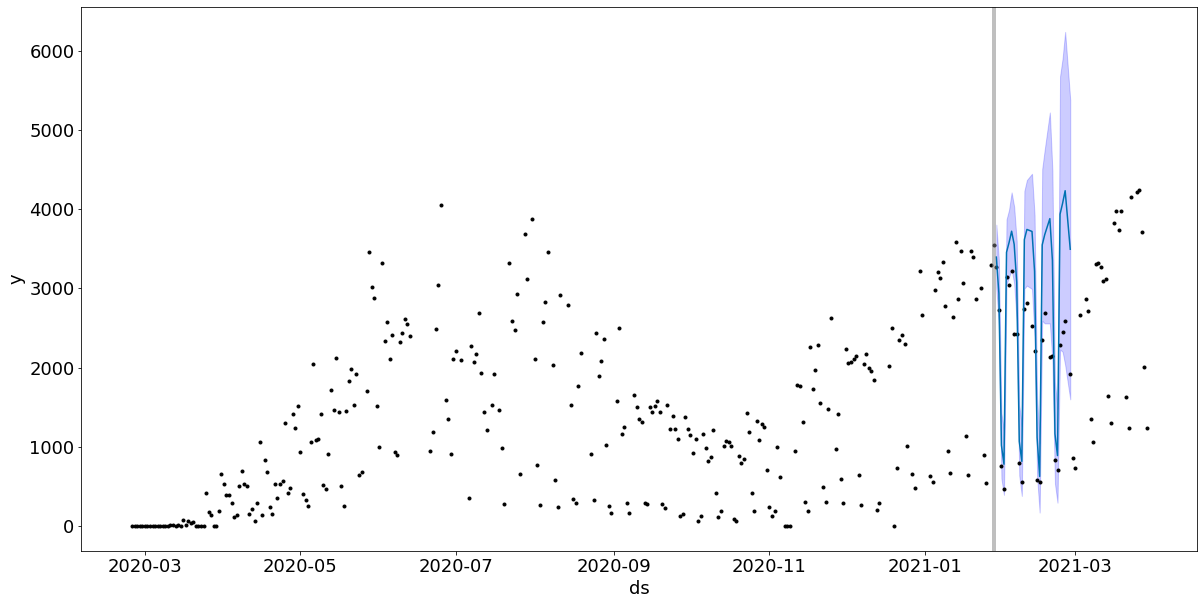

In [100]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [101]:
from fbprophet.diagnostics import performance_metrics

In [102]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [103]:
df_p

horizon           mse         rmse         mae     mdape  coverage
0   3 days  7.955583e+04   282.056434  215.036073  0.161359  0.833333
1   4 days  1.277889e+05   357.475753  292.307427  0.182401  0.777778
2   5 days  1.202535e+05   346.775860  285.958967  0.187758  0.825397
3   6 days  1.345373e+05   366.793278  297.938288  0.183762  0.796296
4   7 days  9.323327e+04   305.341237  246.449792  0.117664  0.833333
5   8 days  2.108618e+05   459.196857  362.574061  0.175970  0.626984
6   9 days  2.012890e+05   448.652401  352.378786  0.222475  0.675926
7  10 days  1.900036e+05   435.894054  366.537727  0.246928  0.740741
8  11 days  1.183920e+05   344.081341  305.151186  0.243587  0.904762
9  12 days  1.179460e+05   343.432713  268.221523  0.152804  0.904762
10 13 days  1.918955e+05   438.058809  315.530506  0.126495  0.833333
11 14 days  2.392810e+05   489.163524  364.602565  0.254816  0.793651
12 15 days  3.411619e+05   584.090641  467.651787  0.390602  0.753968
13 16 days  3.242617e+05   569.439778  446.550100  0.272452  0.731481
14 17 days  3.178504e+05   563.782206  445.736233  0.219720  0.738095
15 18 days  3.600026e+05   600.002197  446.967589  0.216336  0.777778
16 19 days  4.146028e+05   643.896590  487.328240  0.223677  0.842593
17 20 days  5.022608e+05   708.703582  552.622196  0.246634  0.851852
18 21 days  5.240944e+05   723.943677  568.217020  0.287077  0.841270
19 22 days  6.211905e+05   788.156422  607.155746  0.350023  0.785714
20 23 days  5.437755e+05   737.411340  566.044312  0.385487  0.788889
21 24 days  4.415447e+05   664.488284  512.221689  0.367041  0.865079
22 25 days  2.829083e+05   531.891234  417.636628  0.267924  0.952381
23 26 days  6.209554e+05   788.007261  546.182590  0.242935  1.000000
24 27 days  8.454404e+05   919.478354  669.700130  0.347856  1.000000
25 28 days  1.036255e+06  1017.966149  774.690947  0.420064  1.000000
26 29 days  7.600163e+05   871.789143  663.599229  0.420064  0.944444
27 30 days  5.868812e+05   766.081723  571.281097  0.500256  0.888889

In [104]:
from fbprophet.plot import plot_cross_validation_metric

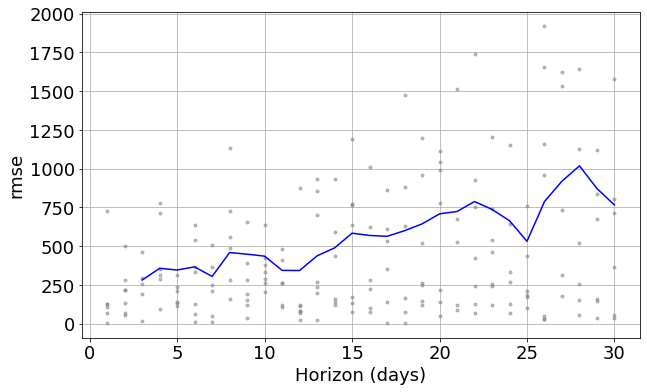

In [105]:
fig = plot_cross_validation_metric(df_cv,metric='rmse') #rmse

#Saiba mais

In [106]:
from fbprophet.diagnostics import cross_validation

In [107]:
%time
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


In [108]:
%time
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days', parallel='processes')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8a2242e110>


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [109]:
lista_cutoff = df_cv['cutoff'].unique()

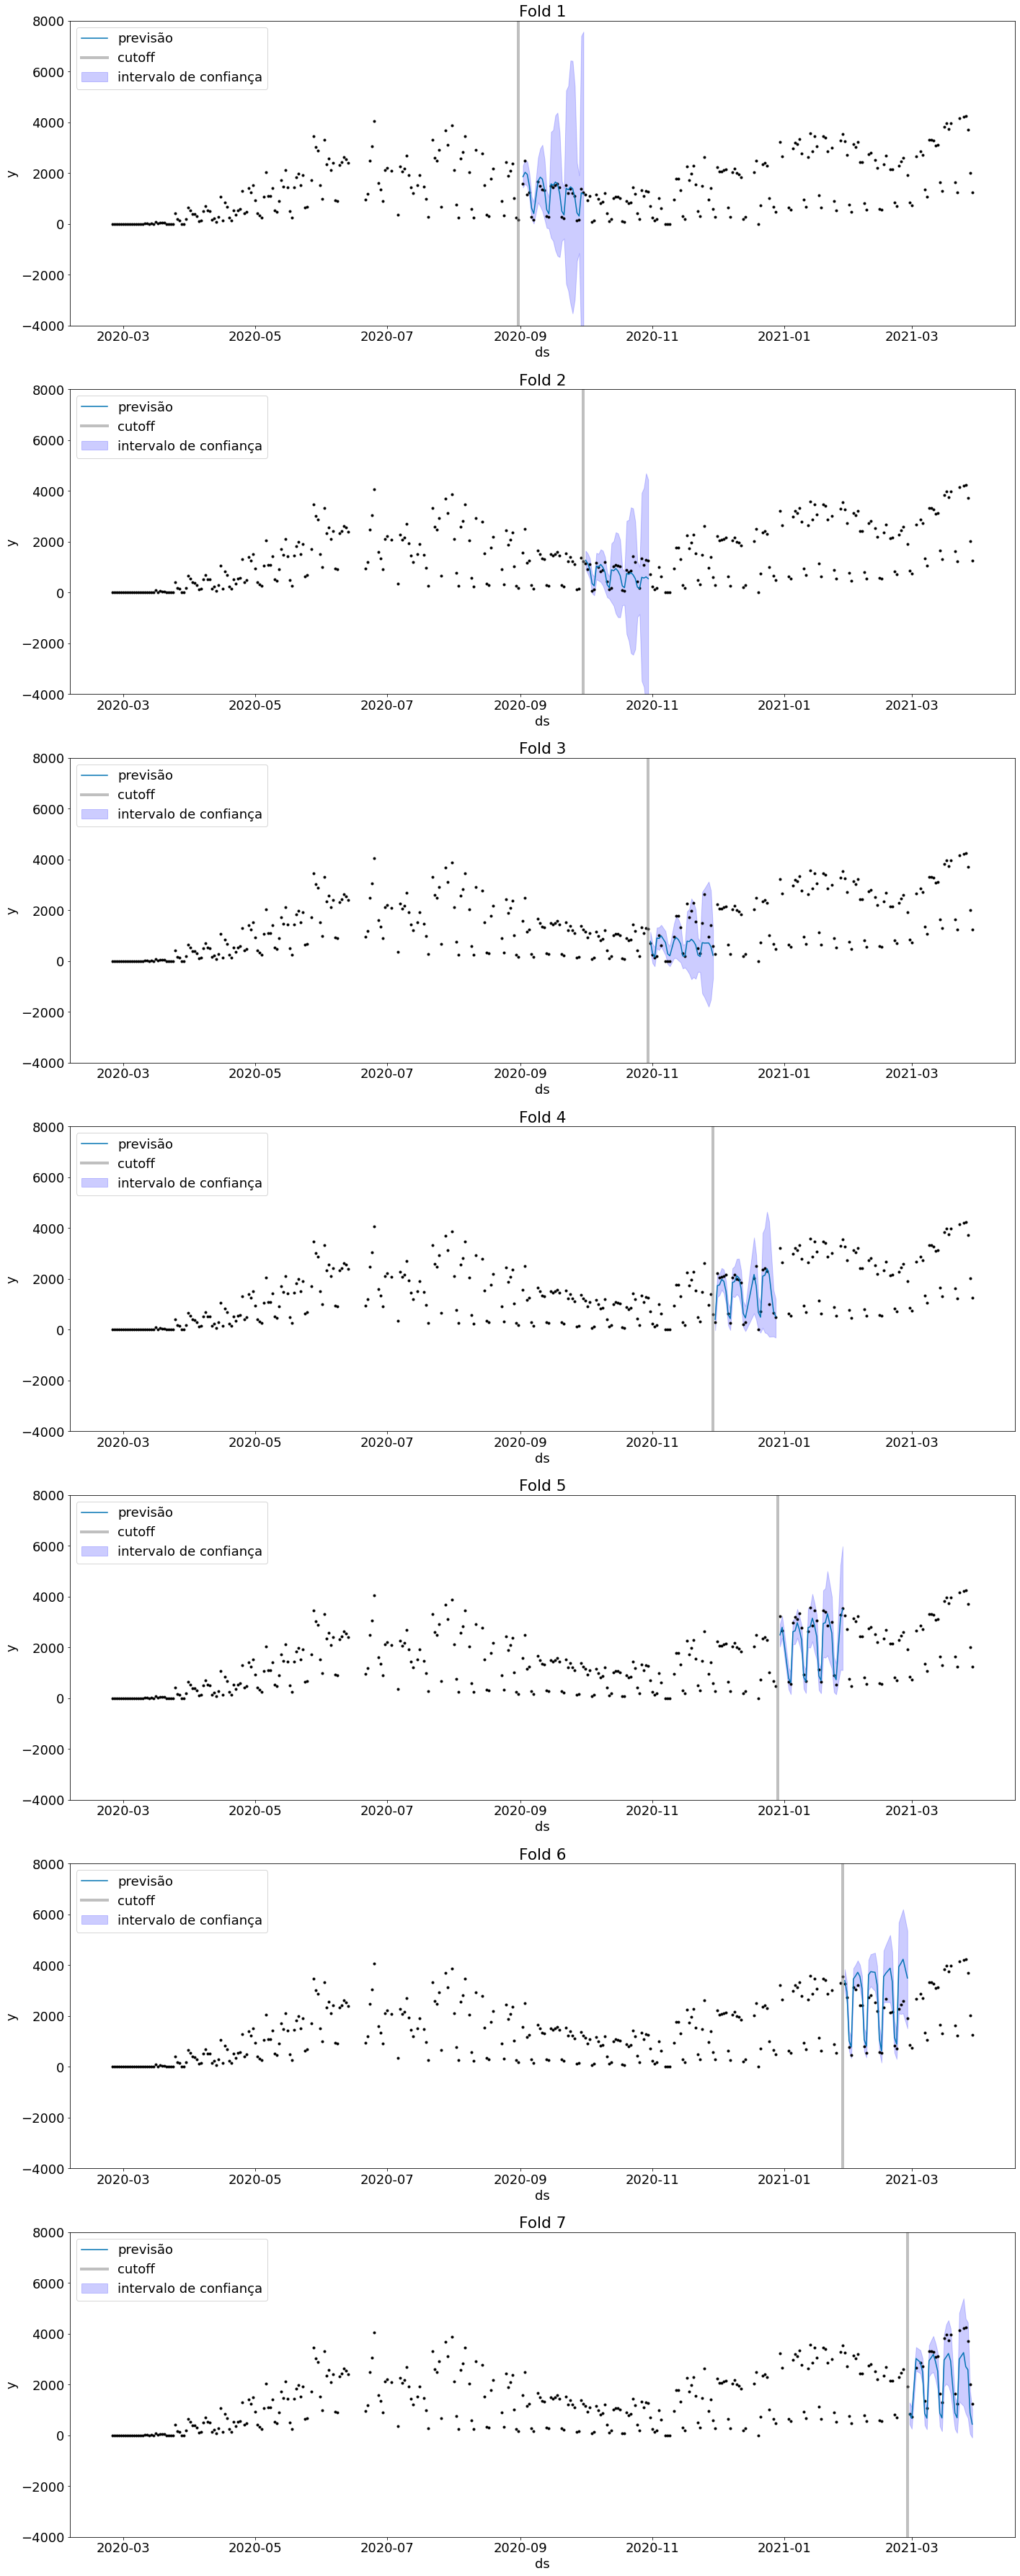

In [110]:
fig, axs = plt.subplots(len(lista_cutoff), 1, figsize=(20,50))

for ind, cutoff in enumerate(lista_cutoff):

    df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
   
    axs[ind].plot(modelo.history['ds'].values, modelo.history['y'], 'k.')

    axs[ind].plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2', label='previsão')
    
    axs[ind].fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                    df_cv_cut['yhat_upper'], color='blue',
                    alpha=0.2, label='intervalo de confiança')
    
    axs[ind].axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5, label='cutoff')
    
    axs[ind].set_title(f'Fold {ind + 1}')
    axs[ind].set_ylabel('y')
    axs[ind].set_xlabel('ds')
    axs[ind].legend(loc=2)

    axs[ind].set_ylim(-4000, 8000)
fig.tight_layout()
plt.show()

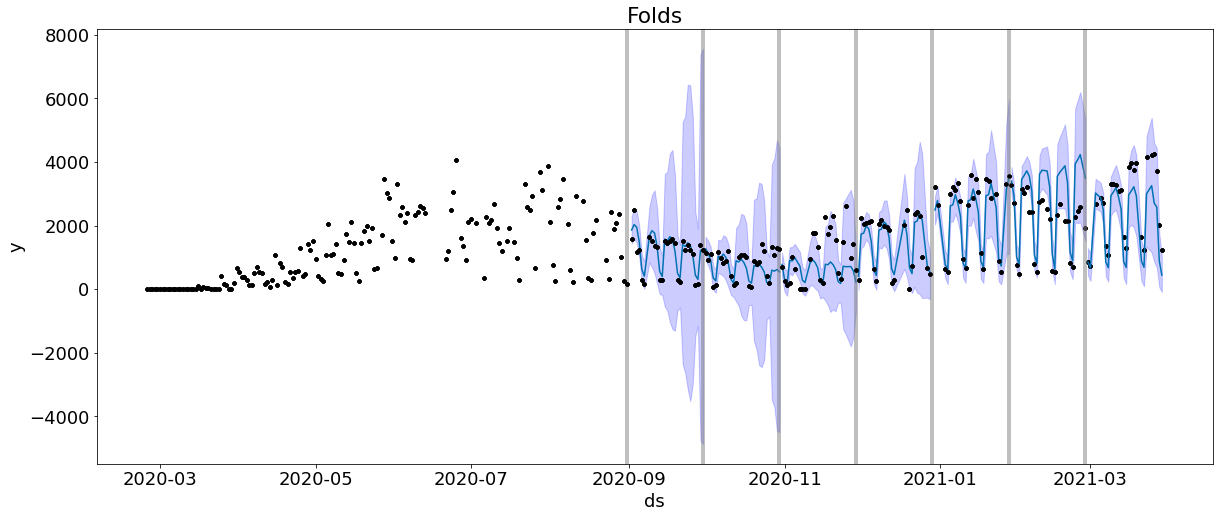

In [111]:
for cutoff in lista_cutoff:

    df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
   
    ax = plt.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')

    plt.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2', label='previsão')
    
    plt.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                    df_cv_cut['yhat_upper'], color='blue',
                    alpha=0.2, label='intervalo de confiança')
    
    plt.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5, label='cutoff')
    
plt.title(f'Folds')
plt.ylabel('y')
plt.xlabel('ds')
fig.tight_layout()
plt.show()